In [10]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [11]:
x = np.sort(5 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列
y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行

In [12]:
print(y)

[ 0.05591218  0.317109    0.38054052  0.385014    0.39846101  0.43353121
  0.44269486  0.63321536  0.75700987  0.77269006  0.82596013  0.86209463
  0.87416196  0.88673667  0.92902095  0.95518486  0.96524043  0.96806977
  0.97667376  0.99890467  0.98163426  0.9695406   0.96552497  0.95645531
  0.92822815  0.7889852   0.65645022  0.52482928  0.46670756  0.36149073
  0.22515152  0.09372429 -0.07967311 -0.46497444 -0.59428209 -0.89404203
 -0.905242   -0.98011981 -0.98354162 -0.99721522]


In [13]:
print(x.ravel())

[0.17400241 0.26270043 0.39757864 0.4071561  0.43223683 0.54381918
 0.84300838 1.25879665 1.39140133 1.55603312 1.6202903  2.13679615
 2.25003012 2.34864438 2.40868867 2.597424   2.67241508 2.72242873
 3.08257726 3.13298595 3.21596774 3.48363226 3.54065461 3.59826621
 3.6054658  3.664619   3.85357525 4.01685937 4.02099801 4.05311452
 4.11576217 4.22906031 4.32974579 4.39048022 4.40090009 4.51006514
 4.71354536 4.83125809 4.88208144 4.97567952]


In [14]:
y[::5] += 3 * (0.5 - np.random.rand(8)) #添加‘噪声’

In [15]:
print(y)

[ 1.07311912  0.317109    0.38054052  0.385014    0.39846101  0.95486557
  0.44269486  0.63321536  0.75700987  0.77269006  1.99396085  0.86209463
  0.87416196  0.88673667  0.92902095  1.7059936   0.96524043  0.96806977
  0.97667376  0.99890467  0.48736948  0.9695406   0.96552497  0.95645531
  0.92822815  1.54426579  0.65645022  0.52482928  0.46670756  0.36149073
  0.13593331  0.09372429 -0.07967311 -0.46497444 -0.59428209  0.02133997
 -0.905242   -0.98011981 -0.98354162 -0.99721522]


In [16]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
#下面的警告，是由于版本问题，可以不予理会！！！！！！

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


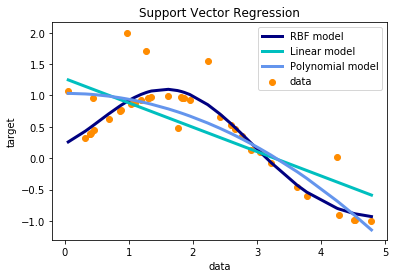

In [19]:
lw = 3
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

1、以上是用SVM做回归

2、支持分类的支持向量机可以推广到解决回归问题，这种方法称为支持向量回归：
   支持向量分类所产生的模型仅仅依赖于训练数据的一个子集，因为构建模型的成本函数不关心在超出边界范围的点，类似的，通过支持向量回归产生的模    型依赖于训练数据的一个子集，因为构建模型的函数忽略了靠近预测模型的数据集。有三种不同的实现方式：支持向量回归SVR，nusvr和linearsvr。      linearsvr提供了比SVR更快实施但只考虑线性核函数，而nusvr实现比SVR和linearsvr略有不同
